In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
solos_df = pd.read_csv('wrangled_train_solos_df.csv', index_col=0)

In [3]:
X = solos_df.drop(['Id', 'winPlacePerc'], axis=1)
y = solos_df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [4]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [6]:
knn_predict = knn.predict(X_test)

In [19]:
print(f'{knn.score(X_train, y_train)}')
print(f'{knn.score(X_test, y_test)}')

0.9314433193601307
0.8968198313701633


In [8]:
knn_compare = y_test.to_frame()
knn_predict = pd.Series(knn_predict)
knn_compare['knn_predict'] = knn_predict

In [9]:
knn_compare.head()

,winPlacePerc,knn_predict
710443,0.7020,NaN
625623,0.1458,NaN
696302,0.7350,NaN
264598,0.4375,NaN
5674,0.9680,0.73624


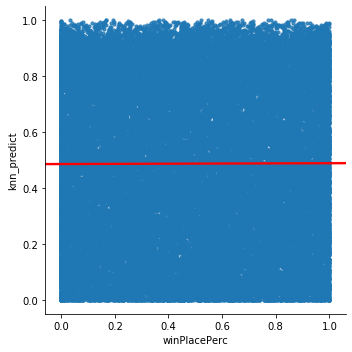

In [10]:
sns.lmplot('winPlacePerc', 'knn_predict', data=knn_compare, line_kws={'color': 'red'}, scatter_kws={'s': 10})

In [11]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [12]:
rf_predict = rf.predict(X_test)
rf_predict = pd.Series(rf_predict)

In [13]:
knn_compare['rf_predict'] = rf_predict
knn_compare.head()

,winPlacePerc,knn_predict,rf_predict
710443,0.7020,NaN,NaN
625623,0.1458,NaN,NaN
696302,0.7350,NaN,NaN
264598,0.4375,NaN,NaN
5674,0.9680,0.73624,0.792928


In [14]:
print(f'{rf.score(X_train, y_train)}')
print(f'{rf.score(X_test, y_test)}')

0.9935668993687957
0.9560258667055641


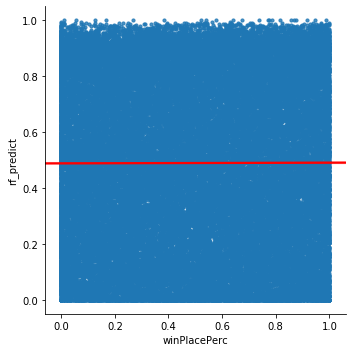

In [15]:
sns.lmplot('winPlacePerc', 'rf_predict', data=knn_compare, line_kws={'color': 'red'}, scatter_kws={'s': 10})

In [16]:
knn_mse = mean_squared_error(y_test, knn_predict)
knn_rmse = knn_mse ** (1/2)

rf_mse = mean_squared_error(y_test, rf_predict)
rf_rmse = rf_mse ** (1/2)

In [17]:
print(f'KNN Regression MSE:  {knn_mse}')
print(f'KNN Regression RMSE: {knn_rmse}')
print('\n')
print(f'RF Regression MSE:  {rf_mse}')
print(f'RF Regression RMSE: {rf_rmse}')

KNN Regression MSE:  0.00920145289284381
KNN Regression RMSE: 0.09592420389476167


RF Regression MSE:  0.0039215473417571105
RF Regression RMSE: 0.06262225915564777
